# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd
import numpy as np

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

# Load traffic sign names from CSV file
traffic_sign_names = pd.read_csv('signnames.csv', index_col='ClassId')

print()
print("Successfully completed data loading!")


Successfully completed data loading!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("BASIC DATA SUMMARY")
print("==================")
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print()
print("TRAFFIC SIGN CLASSES")
print("====================")
traffic_sign_names

BASIC DATA SUMMARY
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43

TRAFFIC SIGN CLASSES


,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

VISUALIZE ALL TRAFFIC SIGN CLASSES IN OUR DATASET


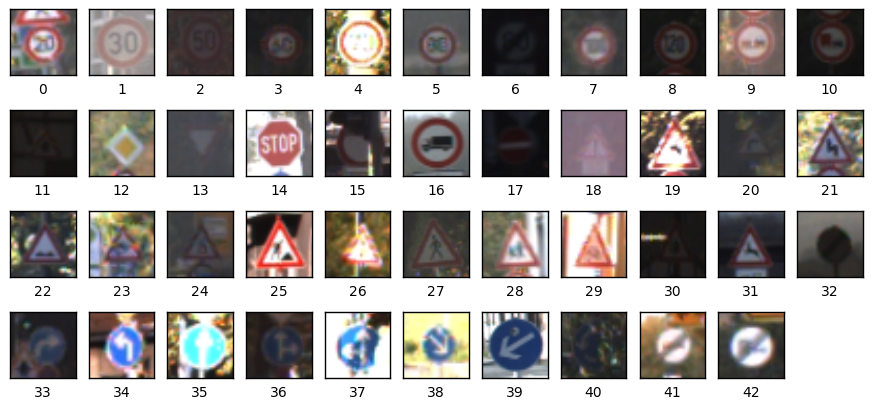

In [3]:
### Data exploration visualization goes here.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

print("VISUALIZE ALL TRAFFIC SIGN CLASSES IN OUR DATASET")
print("=================================================")

cols = 11
rows = n_classes // cols + 1
fig = plt.figure(figsize=(cols, rows * 1.25))

for i in range(n_classes):
    for j in range(len(y_train)):
        if (i == y_train[j]):
            plt.subplot(rows, cols, i+1)
            plt.imshow(X_train[j])
            plt.xlabel('{}'.format(i))
            plt.xticks([])
            plt.yticks([])
            break

plt.show()

TRAINING AND TEST DATA DISTRIBUTION W.R.T TRAFFIC SIGN CLASSES


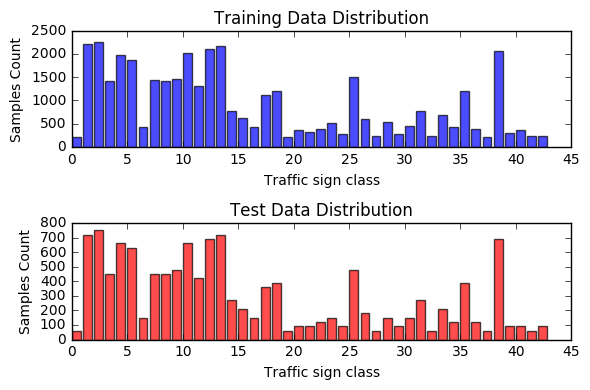

In [4]:
import collections

labels_count_train = collections.Counter(y_train)
labels_train, values_train = zip(*labels_count_train.items())
indexes_train = np.arange(len(labels_train))

labels_count_test = collections.Counter(y_test)
labels_test, values_test = zip(*labels_count_test.items())
indexes_test = np.arange(len(labels_test))

print("TRAINING AND TEST DATA DISTRIBUTION W.R.T TRAFFIC SIGN CLASSES")
print("==============================================================")

plt.subplot(211)
plt.bar(indexes_train, values_train, alpha=0.7)
plt.title('Training Data Distribution')
plt.xlabel("Traffic sign class")
plt.ylabel("Samples Count")

plt.subplot(212)
plt.bar(indexes_test, values_test, alpha=0.7, color='r')
plt.title('Test Data Distribution')
plt.xlabel("Traffic sign class")
plt.ylabel("Samples Count")

plt.tight_layout()
plt.show()

#### DATA EXPLORATION SUMMARY

- Training data distribution is uneven, with many traffic sign classes with samples less than 300, while the rest average above 1000 samples/traffic sign class.
- Need to generate more sample data for those traffic sign classes having samples less than 500.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
from scipy.ndimage import rotate
print("GENERATE ADDITIONAL DATA")
print('========================')
print('Generating additional training samples for traffic sign classes with less than 500 samples ...')
angles = [-2, 2, -5, 5, -7, 7, -10, 10]

# For each of the traffic sign class with less than 500 samples, 
# add 3 of each samples with slight angle changes from -10 to 10 degrees
for i in range(len(labels_count_train)):
    if labels_count_train[i] > 500:
        continue
        
    X_train_new = []
    y_train_new = []
    mask = np.where(y_train == i)

    j = 0
    for sample in X_train[mask]:
        X_train_new.append(rotate(sample, angles[j % len(angles)], reshape=False))
        y_train_new.append(i)
        X_train_new.append(rotate(sample, angles[(j+1) % len(angles)], reshape=False))
        y_train_new.append(i)
        X_train_new.append(rotate(sample, angles[(j+2) % len(angles)], reshape=False))
        y_train_new.append(i)
        j += 1

    X_train = np.append(X_train, X_train_new, axis=0)
    y_train = np.append(y_train, y_train_new, axis=0)

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print()
print('DATA SUMMARY (After Additional Data)')
print('====================================')
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print('Done')

GENERATE ADDITIONAL DATA
Generating additional training samples for traffic sign classes with less than 500 samples ...

DATA SUMMARY (After Additional Data)
Number of training examples = 57119
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Done


TRAINING DATA DISTRIBUTION BEFORE AND AFTER ADDITIONAL DATA


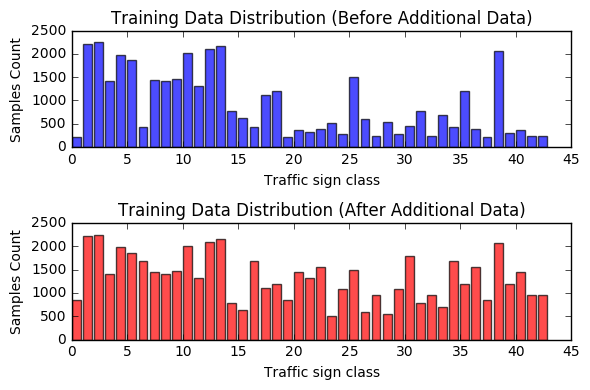

In [6]:
print("TRAINING DATA DISTRIBUTION BEFORE AND AFTER ADDITIONAL DATA")
print("===========================================================")

labels_count_after = collections.Counter(y_train)
labels_after, values_after = zip(*labels_count_after.items())
indexes_after = np.arange(len(labels_after))

plt.subplot(211)
plt.bar(indexes_train, values_train, alpha=0.7)
plt.title('Training Data Distribution (Before Additional Data)')
plt.xlabel("Traffic sign class")
plt.ylabel("Samples Count")

plt.subplot(212)
plt.bar(indexes_after, values_after, alpha=0.7, color='r')
plt.title('Training Data Distribution (After Additional Data)')
plt.xlabel("Traffic sign class")
plt.ylabel("Samples Count")

plt.tight_layout()
plt.show()

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import random
from PIL import Image, ImageEnhance

print("PRE-PROCESS DATA")
print("================")

def enhanceImage(image_data, factor=2.0):
    im = Image.fromarray(image_data, mode='RGB')
    enhancer = ImageEnhance.Sharpness(im)
    return np.array(enhancer.enhance(factor).getdata(),np.uint8).reshape(im.size[1], im.size[0], 3)

def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    x_max = 255.0
    x_min = 0.0
    return a + (image_data * (b - a) / (x_max - x_min))

print("Normalize training and test samples ...")
X_train = normalize(X_train)
X_test = normalize(X_test)
print('Done')

PRE-PROCESS DATA
Normalize training and test samples ...
Done


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

- Generate additional data, to have better distribution and enough samples for training the model.
- Normalize data, to mitigate the variations in the image data.
- Since the image quality of the traffic signs provided in the dataset are not in good quality, thought of trying to enhance the images as part of pre-process.
- Tried a few image enhacements (grayscale, contrast/sharpness image enhancements). All of my image enhancement experiments resulted in lower validation and prediction accuracies. So, decided to proceed with out image enhancements.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

- Data Augmentation: Generated additional samples to mitigate imbalanced distribution of the training data. 
- Added 3x training samples, with slight rotation (-10 to 10 degrees) of the images, to traffic signs with less than 500 samples in the dataset.
- Normalized training and test data. 
- StartifiedShuffleSplit used for splitting the training and validation samples, for each of the EPOC. This step enabled the use of entire training data, while keeping specified amount of data (5%) for cross validation.

### ARCHITECTURE

![Architecture](tensorboard.png)

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# reset graph
tf.reset_default_graph()

keep_prob = tf.placeholder(tf.float32, name='KeepProb')

def LeNet(x):    
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x16.
    conv1_W = tf.get_variable("conv1_W", shape=[3, 3, 3, 16],
           initializer=tf.contrib.layers.xavier_initializer())
    conv1_b = tf.get_variable("conv1_b", shape=[16],
           initializer=tf.contrib.layers.xavier_initializer())
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Dropout.
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # Pooling. Input = 32x32x16. Output = 16x16x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. Output = 16x16x64.
    conv2_W = tf.get_variable("conv2_W", shape=[3, 3, 16, 64],
           initializer=tf.contrib.layers.xavier_initializer())
    conv2_b = tf.get_variable("conv2_b", shape=[64],
           initializer=tf.contrib.layers.xavier_initializer())
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Dropout.
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Pooling. Input = 16x16x64. Output = 8x8x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Flatten. Input = 8x8x64. Output = 4096.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 4096. Output = 512.
    fc1_W = tf.get_variable("fc1_W", shape=[4096, 512],
           initializer=tf.contrib.layers.xavier_initializer())
    fc1_b = tf.get_variable("fc1_b", shape=[512],
           initializer=tf.contrib.layers.xavier_initializer())
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 512. Output = 144.
    fc2_W = tf.get_variable("fc2_W", shape=[512, 144],
           initializer=tf.contrib.layers.xavier_initializer())
    fc2_b = tf.get_variable("fc2_b", shape=[144],
           initializer=tf.contrib.layers.xavier_initializer())
        
    fc1 = tf.nn.dropout(fc1, keep_prob)
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 144. Output = 43.
    fc3_W = tf.get_variable("fc3_W", shape=[144, 43],
           initializer=tf.contrib.layers.xavier_initializer())
    fc3_b = tf.get_variable("fc3_b", shape=[43],
           initializer=tf.contrib.layers.xavier_initializer())

    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

- Re-purposed LeNet architecture from MINST data classification.
- Architecture: 5 layers architecture, 2 convolutional and 3 fully connected layers.
- After the activation of convolutional layers, dropouts and max pooling techniques are used.
- Added TensorBoard visualization as part of the project submission.

### TRAINING MODEL

In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 25
BATCH_SIZE = 128
LEARNING_RATE = 0.001
LOG_PATH = './log'

# Split the train and validation, different dataset for each of the EPOCH
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=EPOCHS, test_size=0.05, random_state=450)
X_train_org = X_train
y_train_org = y_train

x = tf.placeholder(tf.float32, (None, 32, 32, 3), name="InputData")
y = tf.placeholder(tf.int32, (None), name="LabelData")
    
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)

with tf.name_scope('Model'):
    prediction = tf.nn.softmax(logits)
    
with tf.name_scope('Loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)

with tf.name_scope('Train'):
    optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
    training_operation = optimizer.minimize(loss_operation)

with tf.name_scope('Accuracy'):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

# create a summary for our cost and accuracy
tf.summary.scalar("loss", loss_operation)
tf.summary.scalar("accuracy", accuracy_operation)

# merge all summaries into a single operation
summary_operation = tf.summary.merge_all()

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation] , 
                                  feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

with tf.Session() as sess:
    sess.run(init)
    
    # Initialize logger for Tensorboard
    writer = tf.summary.FileWriter(LOG_PATH, graph=tf.get_default_graph())
    
    print("Training...")
    print()
    
    epoch = 0
    for train_index, test_index in sss.split(X_train_org, y_train_org):
        
        # Generate Training and Validation datasets for each of the EPOCH
        X_train, X_validation = X_train_org[train_index], X_train_org[test_index]
        y_train, y_validation = y_train_org[train_index], y_train_org[test_index]
        
        num_examples = len(X_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, summary = sess.run([training_operation, summary_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            writer.add_summary(summary, epoch * BATCH_SIZE + offset)
            
        validation_accuracy, validation_loss = evaluate(X_validation, y_validation)
        print("EPOCH {} Validation Accuracy = {:.3f} Loss = {:.3f}".format(epoch+1, validation_accuracy, validation_loss))
        epoch += 1
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 Validation Accuracy = 0.787 Loss = 1.322
EPOCH 2 Validation Accuracy = 0.899 Loss = 0.682
EPOCH 3 Validation Accuracy = 0.944 Loss = 0.418
EPOCH 4 Validation Accuracy = 0.972 Loss = 0.337
EPOCH 5 Validation Accuracy = 0.983 Loss = 0.227
EPOCH 6 Validation Accuracy = 0.985 Loss = 0.197
EPOCH 7 Validation Accuracy = 0.985 Loss = 0.146
EPOCH 8 Validation Accuracy = 0.986 Loss = 0.141
EPOCH 9 Validation Accuracy = 0.991 Loss = 0.106
EPOCH 10 Validation Accuracy = 0.991 Loss = 0.092
EPOCH 11 Validation Accuracy = 0.989 Loss = 0.078
EPOCH 12 Validation Accuracy = 0.989 Loss = 0.089
EPOCH 13 Validation Accuracy = 0.995 Loss = 0.072
EPOCH 14 Validation Accuracy = 0.994 Loss = 0.066
EPOCH 15 Validation Accuracy = 0.993 Loss = 0.062
EPOCH 16 Validation Accuracy = 0.996 Loss = 0.040
EPOCH 17 Validation Accuracy = 0.992 Loss = 0.047
EPOCH 18 Validation Accuracy = 0.991 Loss = 0.061
EPOCH 19 Validation Accuracy = 0.994 Loss = 0.057
EPOCH 20 Validation Accuracy = 0.993 Loss = 0.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


### **Answer:**

- Optimizer: AdamOptimizer (over GradientDescent), as it uses the momentum (moving average of the parameters) and requires less turning of hyper-parameters.
- Batch size: 128
- EPOCH size: 25, higher the number doesn't add much to the validation accuracy
- Learning rate: 0.001, tried a few higher/lower values resulted with lower validation accuracy

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

- The goal was to get higher validation accuracy before running against test samples.
- Started with 95% validation accuracy using LeNet architecture.
- After improving the pre-process steps and with data augmentation, the accuracy gotten better to 97%
- Fine tuning the architecture output, epoch size, batchsize, learning rate parameters using trial-and-error to get the validation accuracy above 99% 

#### TEST RESULTS

In [10]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, test_loss = evaluate(X_test, y_test)
    print("Test accuracy of the model = {:.3f}".format(test_accuracy))

Test accuracy of the model = 0.945


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

SETTING UP NEW IMAGES


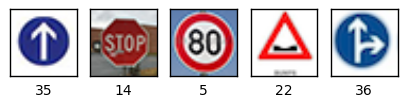

Normalizing new images ...
Done


In [11]:
from PIL import Image

print("SETTING UP NEW IMAGES")
print('=====================')

IMAGE_FOLDER = './new_images'
random_images = [
    '35_ahead.jpg', 
    '14_stop_sign.png',
    '5_speed_limit_80.png', 
    '22_bumpy_road.png', 
    '36_straight_or_right.png'] 
y_test_new = np.array([35,14,5,22,36])

cols = len(random_images)
rows = 1
fig = plt.figure(figsize=(cols, rows))

X_test_new = []
for idx, image_name in enumerate(random_images):
    im = Image.open(IMAGE_FOLDER + '/' + image_name)
    X_test_new.append(np.array(im.getdata(),
                    np.uint8).reshape(im.size[1], im.size[0], 3))
    plt.subplot(rows, cols, idx+1)
    plt.imshow(im)
    plt.xlabel('{}'.format(y_test_new[idx]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

X_test_new = np.asarray(X_test_new, dtype=np.float32)

print("Normalizing new images ...")
X_test_new = normalize(X_test_new)
print('Done')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

- Picked 5 random traffic sign images from the web and plotted above, both in PNG and JPEG formats. 
- Most of the new images are much cleaner looking images, compared to the sample images, which may pose some challenge in prediction.
- A couple of images (stop sign and speed limit 80) are pictures with background, similar to sample images, should be easier to predict, I guess.
- It would be interesting to see if the model will be able to predict all of these new traffic signs.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


### **Answer:**

- Test accuracy is **94.5%** for the model.
- Prediction accuracy is **100%**, in some runs the prediction accuracy was **80%** (4 out 5 images).
- In those runs with 80% prediction accuracy, '22 - bumpy road' traffic sign was incorrectly predicted as '29 - Bicycles crossing' traffic sign. However, '22 - bumpy road' sign came up second or third in the top-k certainities.

In [12]:
### Run the predictions for the new images.
### Feel free to use as many code cells as needed.

print("PREDICTIONS FOR NEW IMAGES")
print("==========================")
print("Test accuracy for the model        = {:.3f}".format(test_accuracy))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    new_images_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test_new, y: y_test_new, keep_prob: 1.0})    
    new_images_prediction = sess.run(tf.argmax(tf.nn.softmax(logits),1), feed_dict={x: X_test_new, keep_prob: 1.0})
    new_images_certainity = sess.run(tf.nn.top_k(logits, 3), feed_dict={x: X_test_new, keep_prob: 1.0})

print("Prediction accuracy for new images = {:.3f}".format(new_images_accuracy))
print("Expected result                (E) =", y_test_new)    
print("Predicted result               (P) =", new_images_prediction)

print()
for i, (predictions, probabilities, expected_class) in enumerate(zip(new_images_certainity.indices, new_images_certainity.values, y_test_new)):
    print("Expected class ({}) Predictions ({}) Probabilities ({})".format(expected_class, predictions, probabilities))


PREDICTIONS FOR NEW IMAGES
Test accuracy for the model        = 0.945
Prediction accuracy for new images = 1.000
Expected result                (E) = [35 14  5 22 36]
Predicted result               (P) = [35 14  5 22 36]

Expected class (35) Predictions ([35 33 36]) Probabilities ([ 19.53583527   5.6151247    4.60992956])
Expected class (14) Predictions ([14  5 17]) Probabilities ([ 19.23553848   7.50917864   5.17961025])
Expected class (5) Predictions ([5 3 2]) Probabilities ([ 17.39094162  10.49360657   8.18199444])
Expected class (22) Predictions ([22 29 30]) Probabilities ([ 11.36541653  10.64253712   6.16275263])
Expected class (36) Predictions ([36 38 18]) Probabilities ([ 13.86822796   8.29612255   3.83335996])


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

- While tuning the parameters to improve performance, I have noticed at least one of the predictions go wrong ('22 - bumpy road' was incorrectly predicted as '29 - Bicycles crossing' or '17 - No entry' traffic sign classes).
- Top K certainity will be helpful, to check if an image falls in top 2 or 3 certainities, especially if the certainities are too close to call.
- Based on the results, it looks that the model works resonably good. However, the lower certainities on predicting new images suggest that there should be a continuous way to improve the model with newer images.

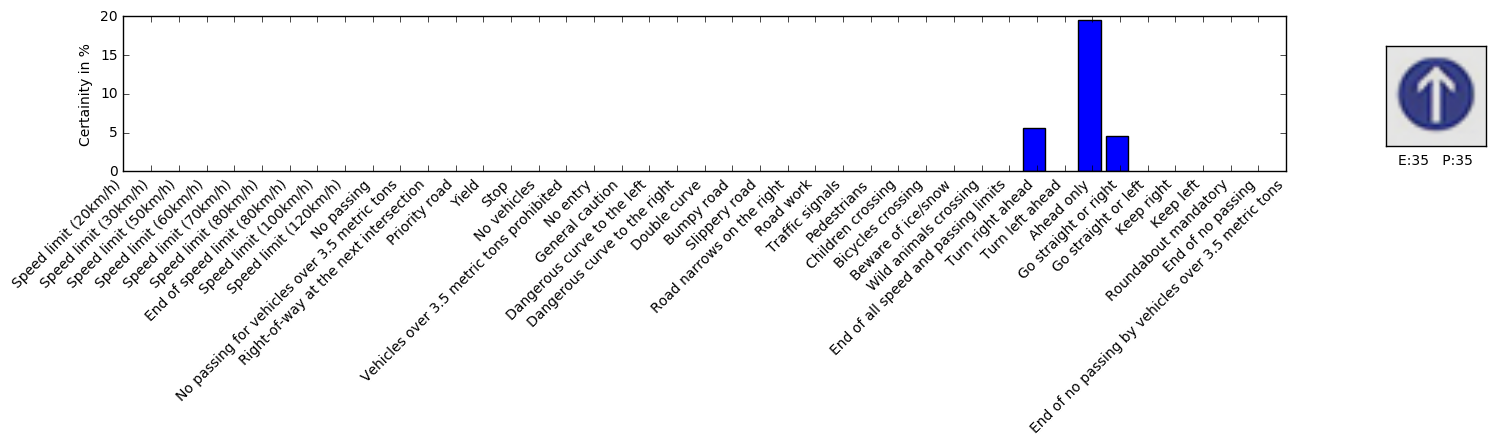

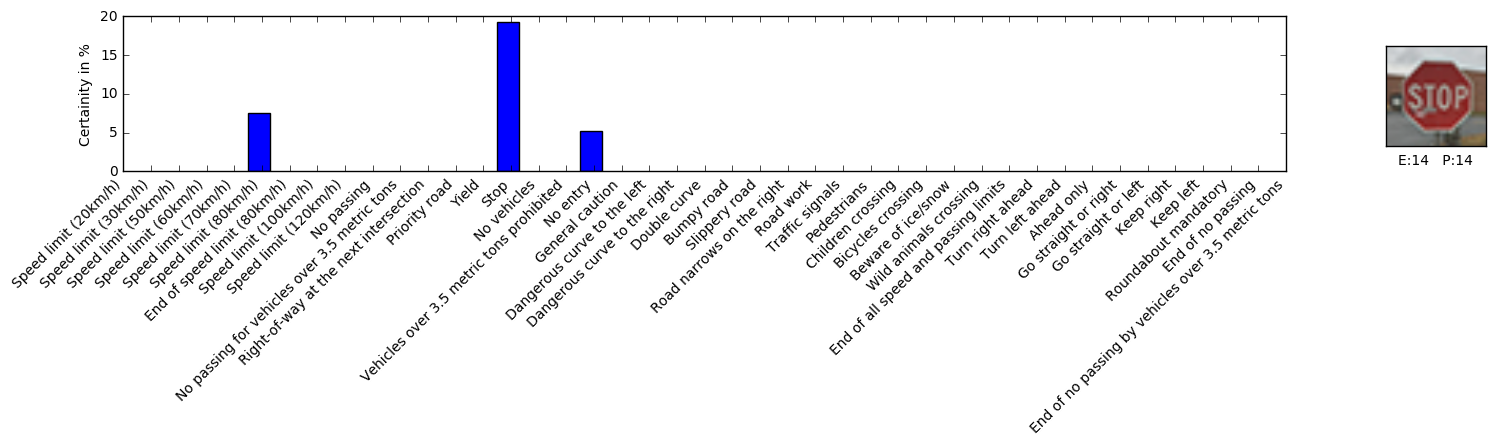

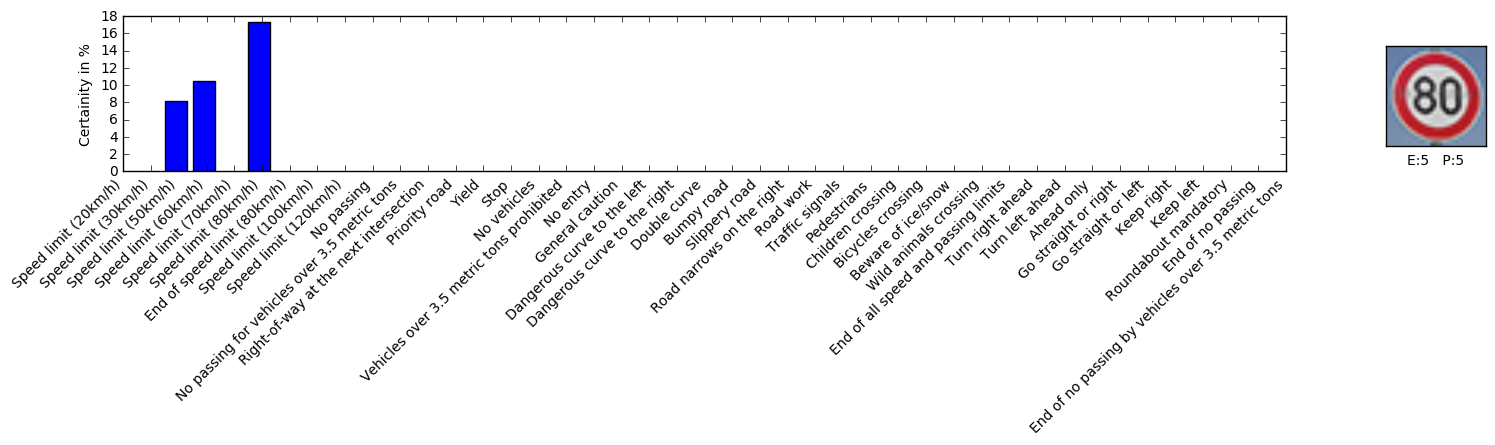

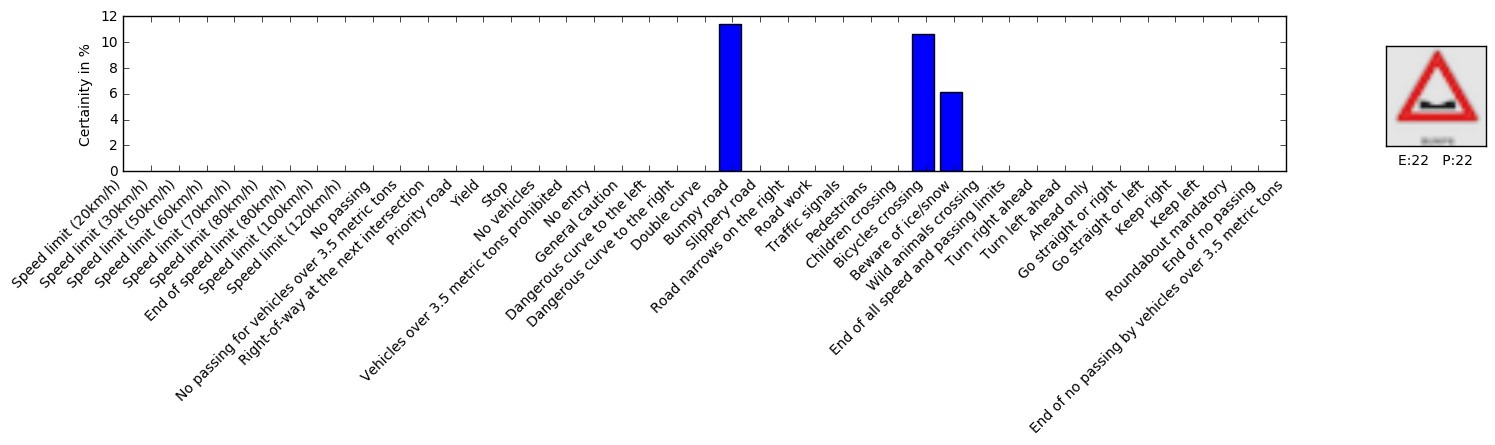

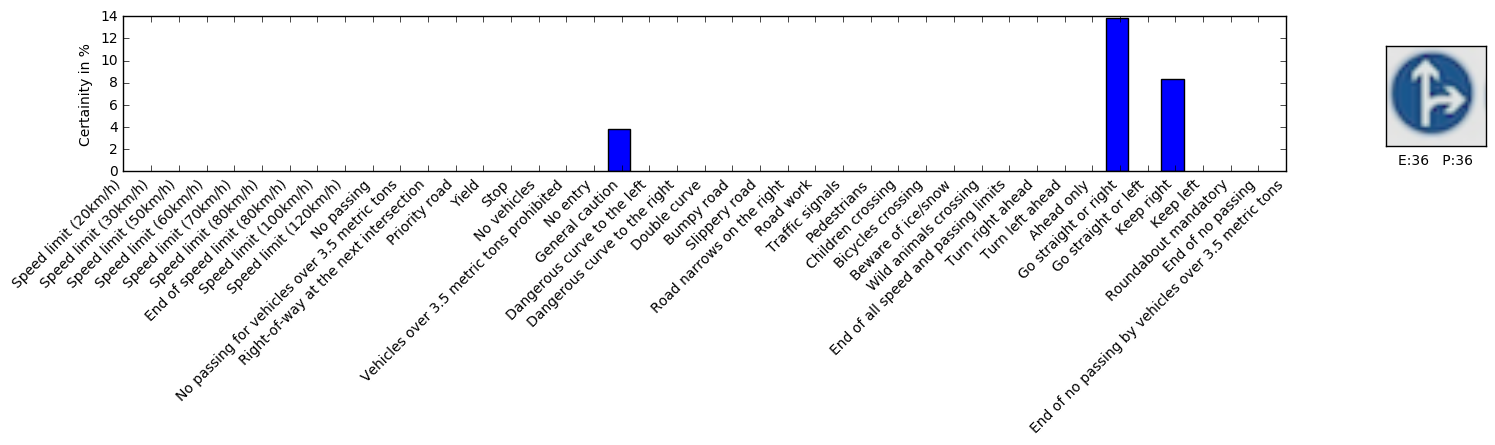

In [13]:
# plot softmax probabilities to visualize the certainty
for i, (predictions, probabilities, expected_image, expected_class) in enumerate(zip(new_images_certainity.indices, new_images_certainity.values, X_test_new, y_test_new)):
    fig = plt.figure(figsize=(15, 2))
    plt.bar(predictions, probabilities)
    plt.ylabel('Certainity in %')
    #plt.yticks(np.arange(0.0, 50.0, 10), np.arange(0.0, 50.0, 10))
    plt.xticks(np.arange(0.5, 43.5, 1.0), list(traffic_sign_names.values.flatten()), ha='right', rotation=45)
    ax = plt.axes([0.75,0.25,0.5,0.5], frameon=True)
    ax.imshow(expected_image)
    ax.set_xlabel('E:{}   P:{}'.format(expected_class, predictions[0]))
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.